In [1]:
import sklearn
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print("sklearn version: ", sklearn.__version__)
print("numpy version: ", np.__version__)
print("pandas version: ", pd.__version__)

sklearn version:  0.23.2
numpy version:  1.18.1
pandas version:  1.1.3


<center> <h1> Generative models - Baseline </h1>

<b>Autor:</b> Edwin Rueda <br>
<b>email:</b> ejrueda95g@gmail.com <br>
<b>github:</b> https://github.com/ejrueda <br>
<b>website:</b> http://edwinrueda.com/ <br>
<b> You can cite this work with</b>:

@software{edwin_rueda_2020_3843381,<br>
  author       = {Edwin Rueda},<br>
  title        = {ejrueda/MasterUFPA: zenodo release},<br>
  month        = may,<br>
  year         = 2020,<br>
  publisher    = {Zenodo},<br>
  version      = {zenodo},<br>
  doi          = {10.5281/zenodo.3843381},<br>
  url          = {https://doi.org/10.5281/zenodo.3843381}<br>
}

- The baseline model is based on K-NN (https://scikit-learn.org/stable/modules/neighbors.html#unsupervised-neighbors)
- The objective is to train a KNN model to generate a synthetic samples based on K nearest neighbors.

### Sample generation - SMOTE: Synthetic Minority Over-sampling Technique
- article: https://www.jair.org/index.php/jair/article/view/10302
- mathematical formulation:
    - a new sample $x_{new}$ is based on a neighbor sample $x_n$ which is based on a KNN algorithm:
        - $x_{new} = x_{i}$ + $\lambda$$*(x_{n}-x_{i})$
        - where:
            - $\lambda$ is a random number between 0 and 1
            - $x_{i}$ is a sample of the dataset to be increase

In [65]:
def smote(T, N, k):
    """
    Inputs:
        T: 2D-data array to be increase
        N: Amount of SMOTE N%. between (0, 100]
        k: Number of nearest neighbors
    Ouput:
    (N/100)* T synthetic minority class samples
    (∗ If N is less than 100%, randomize the minority class samples as only a random
       percent of them will be SMOTEd. ∗)
    """
    if N < 100:
        idxs = np.random.choice(range(len(T)), size=int(len(T)*(N/100)), replace=False)
        T = T[idxs, :]
        N = 100
        
    N = int(N/100)*len(T)
    synthetic = np.ones((N, T.shape[1]))
    neigh = NearestNeighbors(n_neighbors = k)
    neigh.fit(T)
    #generating synthetic samples
    for i in range(N):
        #print(i)
        idx = np.random.randint(low=0, high=T.shape[0])
        T_sample = T[idx] #x_i random sample
        #print(T_sample.shape)
        #getting the k-nearest neighbors
        nn = neigh.kneighbors(T_sample.reshape(1,T.shape[1]), return_distance=False)
        #getting random k-neighbors index
        nn_index = np.random.choice(nn[0])
        while (T_sample == T[nn_index]).all():
            nn_index = np.random.choice(nn[0])
        dif = T_sample - T[nn_index]
        gap = np.random.normal()
        synthetic[i] = T_sample + gap*dif
    
    return synthetic

In [66]:
a = np.random.normal(loc=1, scale=.5, size=(100,2))
a_synthetic = smote(a, 150, 4)
a.shape, a_synthetic.shape

((100, 2), (100, 2))

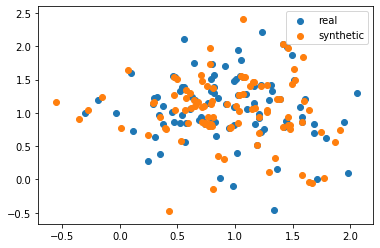

In [67]:
plt.scatter(a[:,0], a[:,1], label="real");
plt.scatter(a_synthetic[:,0], a_synthetic[:,1], label="synthetic", );
plt.legend();

In [68]:
from keras.datasets import mnist

In [69]:
(x_train, y_train), (_, _) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [70]:
x_4 = x_train[y_train==3]
x_4.shape

(6131, 28, 28)

In [71]:
idxs = np.random.choice(range(x_4.shape[0]), size=250, replace=False)
new_x4 = x_4[idxs].reshape((len(idxs), x_4.shape[1]*x_4.shape[2]))
new_x4.shape

(250, 784)

In [72]:
synthetic_samples = smote(new_x4, N=50, k=3)

In [73]:
synthetic_samples = synthetic_samples.reshape((len(synthetic_samples), 28, 28))
synthetic_samples.shape

(125, 28, 28)

real images


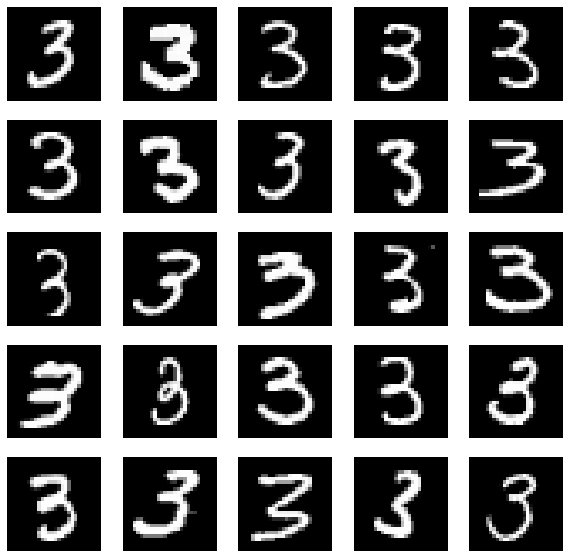

In [74]:
n_ims = 25
print("real images")
plt.figure(figsize=(10,10))
for i in range(n_ims):
    plt.subplot(5,5,i+1)
    plt.imshow(new_x4.reshape((len(new_x4), 28,28))[i],cmap="gray");
    plt.axis("off")

synthetic images


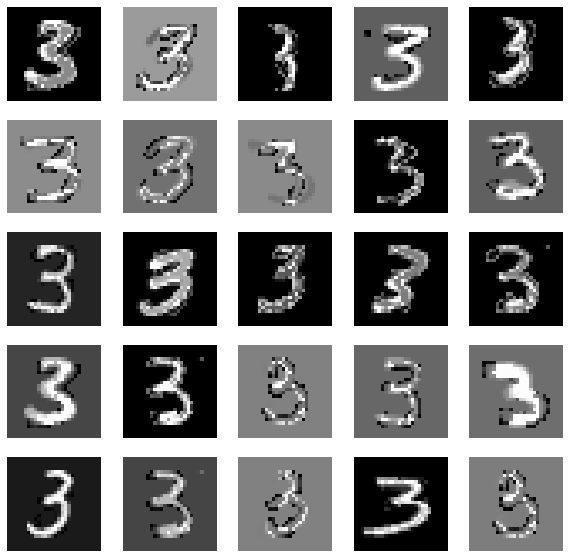

In [75]:
n_ims = 25
plt.figure(figsize=(10,10))
print("synthetic images")
for i in range(n_ims):
    plt.subplot(5,5,i+1)
    plt.imshow(synthetic_samples[i],cmap="gray");
    plt.axis("off")